HepB CLASSIFICATION PROJECT
===========================

# PREPROCESSING AND EDA

In [1]:
# ============================================================================
# 📦 SECTION 1: IMPORTS & SETUP
# ============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV

# Feature Selection & Dimensionality Reduction
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2, RFE
from sklearn.decomposition import PCA

# Imbalanced Learning
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours, NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

# Models
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                                VotingClassifier, StackingClassifier, BaggingClassifier,
                                ExtraTreesClassifier, AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                            f1_score, roc_auc_score, classification_report,
                            confusion_matrix, make_scorer, roc_curve)
from sklearn.utils.class_weight import compute_class_weight

# Advanced Encoding
from category_encoders import TargetEncoder

# Hyperparameter Optimization
import optuna

print("✅ All libraries imported successfully!\n")


✅ All libraries imported successfully!



In [2]:
# ============================================================================
# 📊 SECTION 2: DATA LOADING & INITIAL EXPLORATION
# ============================================================================
print("="*90)
print("📊 LOADING DATA")
print("="*90)

df = pd.read_csv("NHANES_HepB_Clean_Names.csv")
print("\n📋 Dataset Preview:")
print(df.head().to_string())
print(f"\n📐 Dataset Shape: {df.shape}")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")

print("\n📊 Dataset Info:")
df.info()

📊 LOADING DATA

📋 Dataset Preview:
   Patient_ID  Gender   Age  Race_Ethnicity  Education_Level  Birth_Country  Survey_PSU  Survey_Stratum  HepB_Surface_Antibody   ALT   AST  Alkaline_Phosphatase  Blood_Urea_Nitrogen  Chloride   GGT  Glucose_Lab  Total_Protein  Calcium  Cholesterol_Total_Lab  Bicarbonate  Uric_Acid   CRP  White_Blood_Cells  Red_Blood_Cells  Hemoglobin  Hematocrit  Mean_Corpuscular_Volume  Mean_Corpuscular_Hemoglobin  Mean_Corpuscular_Hb_Concentration  Red_Cell_Distribution_Width  Platelets  Neutrophils_Percent  Lymphocytes_Percent  Monocytes_Percent  Eosinophils_Percent  Basophils_Percent  HepA_Antibody  Ferritin  Glycohemoglobin_HbA1c  Glucose_Fasting  LDL_Cholesterol  LDL_Cholesterol_SI  Ever_Had_Hepatitis  Ever_Had_Congestive_Heart_Failure  Ever_Had_Coronary_Heart_Disease  Ever_Had_Heart_Attack  Ever_Had_Stroke  Ever_Had_Liver_Condition  Ever_Had_Cancer  Doctor_Told_Diabetes  Ever_Told_Prediabetes  Received_Hepatitis_A_Vaccine  Received_HPV_Vaccine  Received_HPV_Sho


📈 CORRELATION ANALYSIS

🔍 Generating full correlation heatmap...


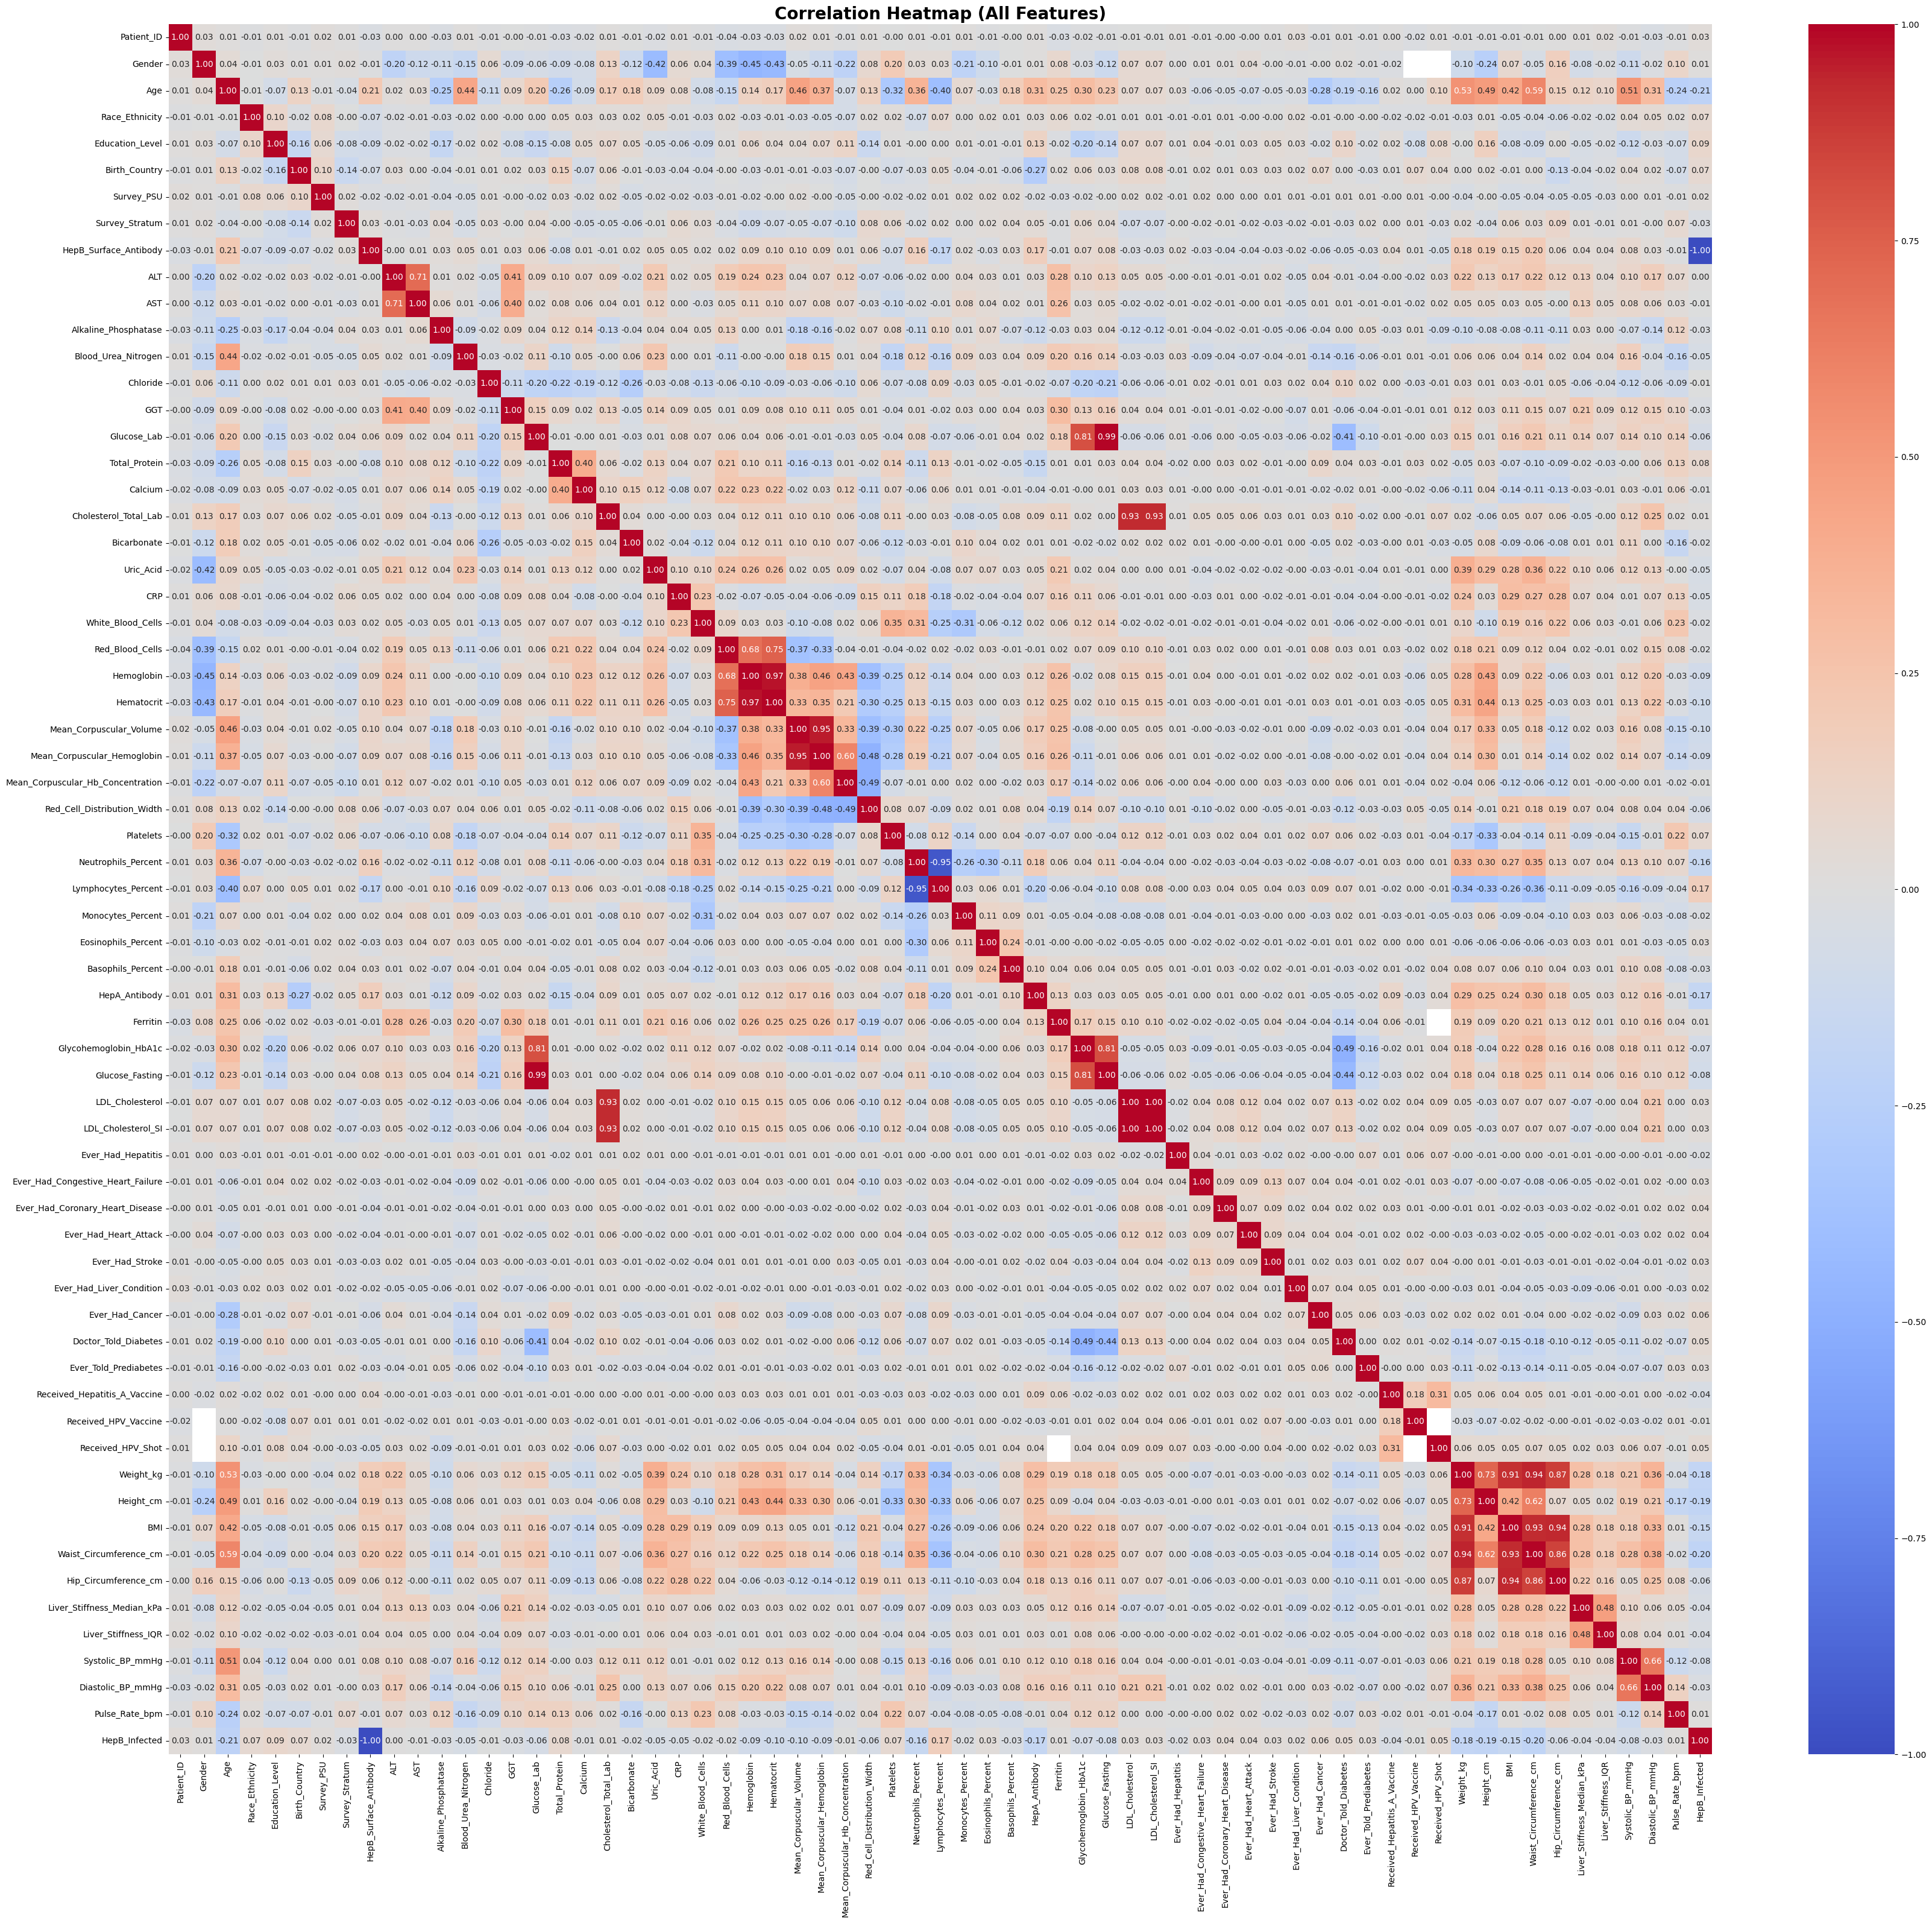


🔝 Top 25 Positive Correlations with HepB_Infected:
Lymphocytes_Percent                  0.169024
Education_Level                      0.088315
Total_Protein                        0.076804
Birth_Country                        0.067786
Platelets                            0.066947
Race_Ethnicity                       0.066866
Ever_Had_Cancer                      0.062398
Received_HPV_Shot                    0.053603
Doctor_Told_Diabetes                 0.051574
Ever_Had_Coronary_Heart_Disease      0.039535
Ever_Had_Heart_Attack                0.036390
Patient_ID                           0.030335
Ever_Had_Stroke                      0.028778
Ever_Had_Congestive_Heart_Failure    0.028123
LDL_Cholesterol_SI                   0.026215
LDL_Cholesterol                      0.026212
Ever_Told_Prediabetes                0.026026
Eosinophils_Percent                  0.025296
Survey_PSU                           0.021671
Ever_Had_Liver_Condition             0.020573
Ferritin                    

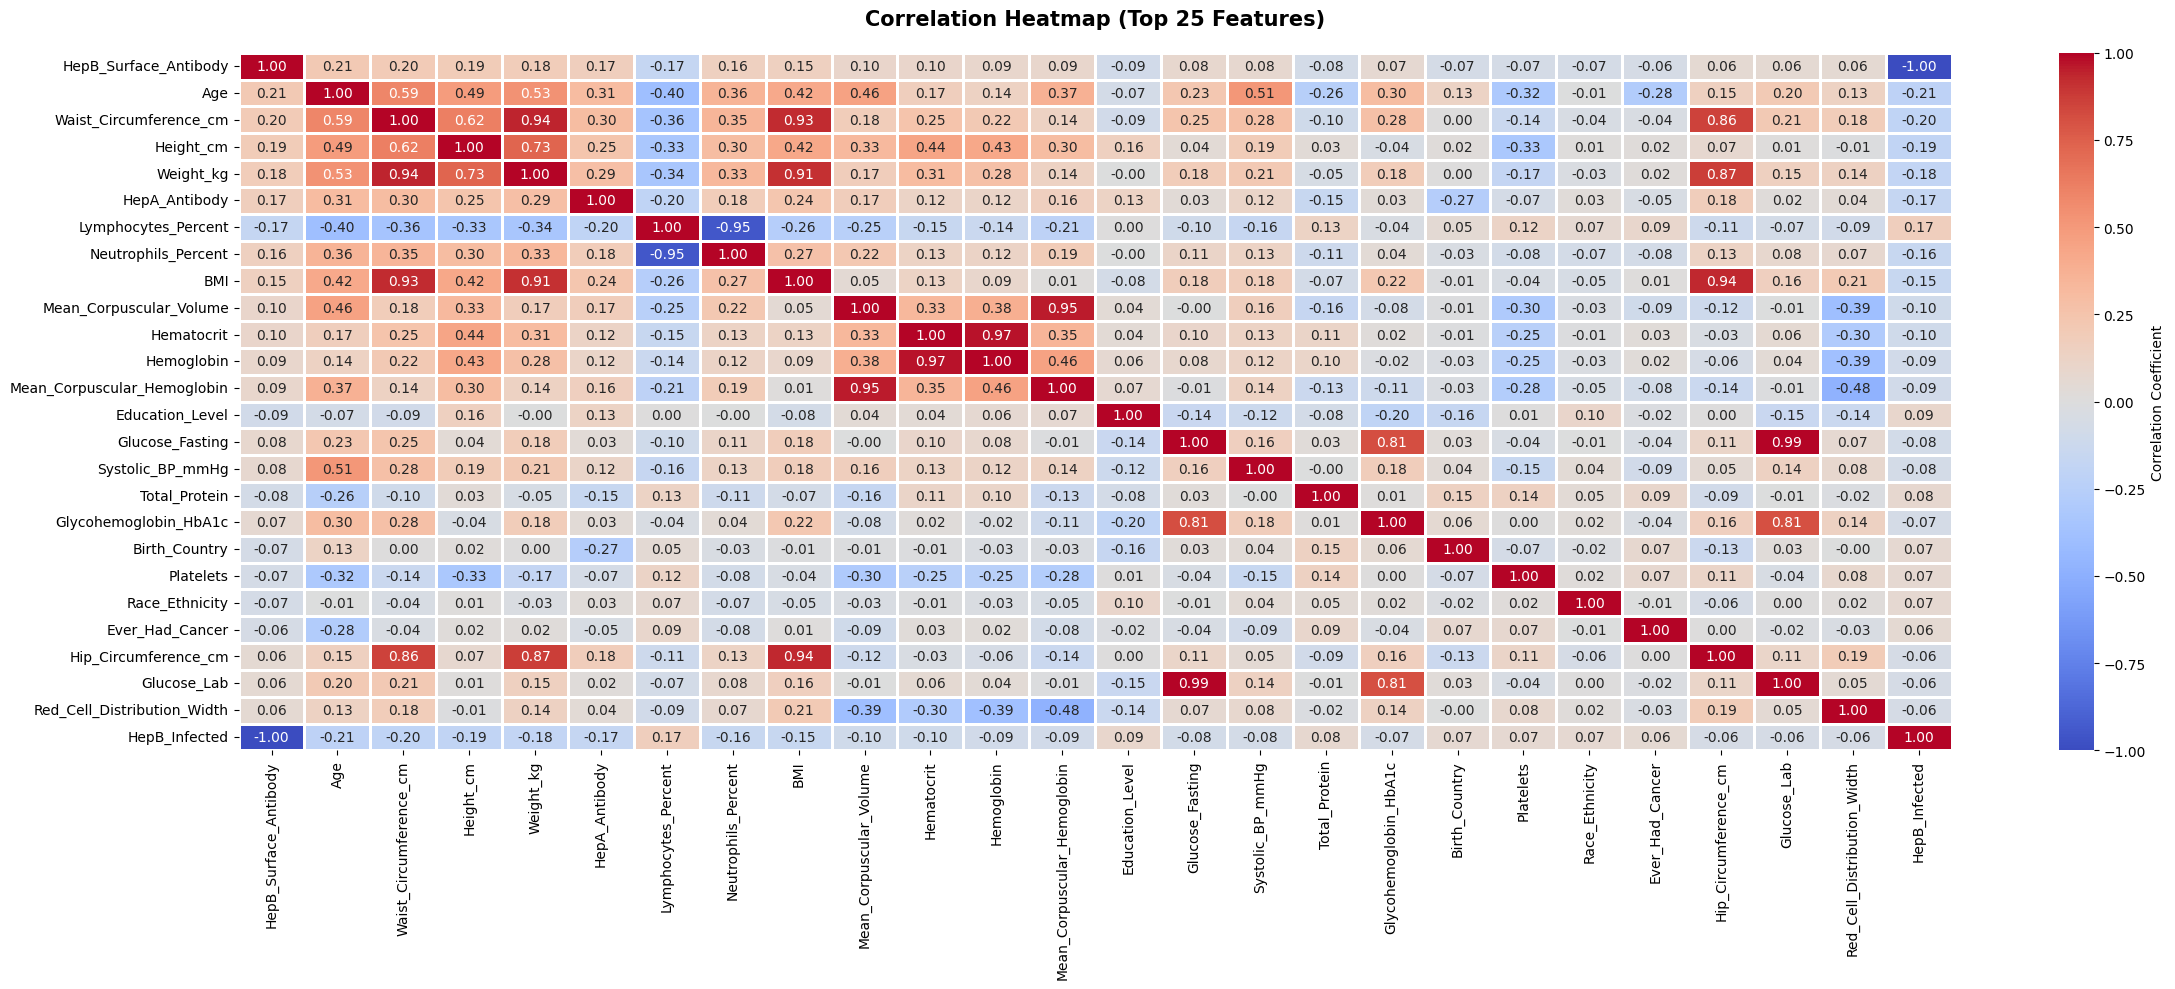

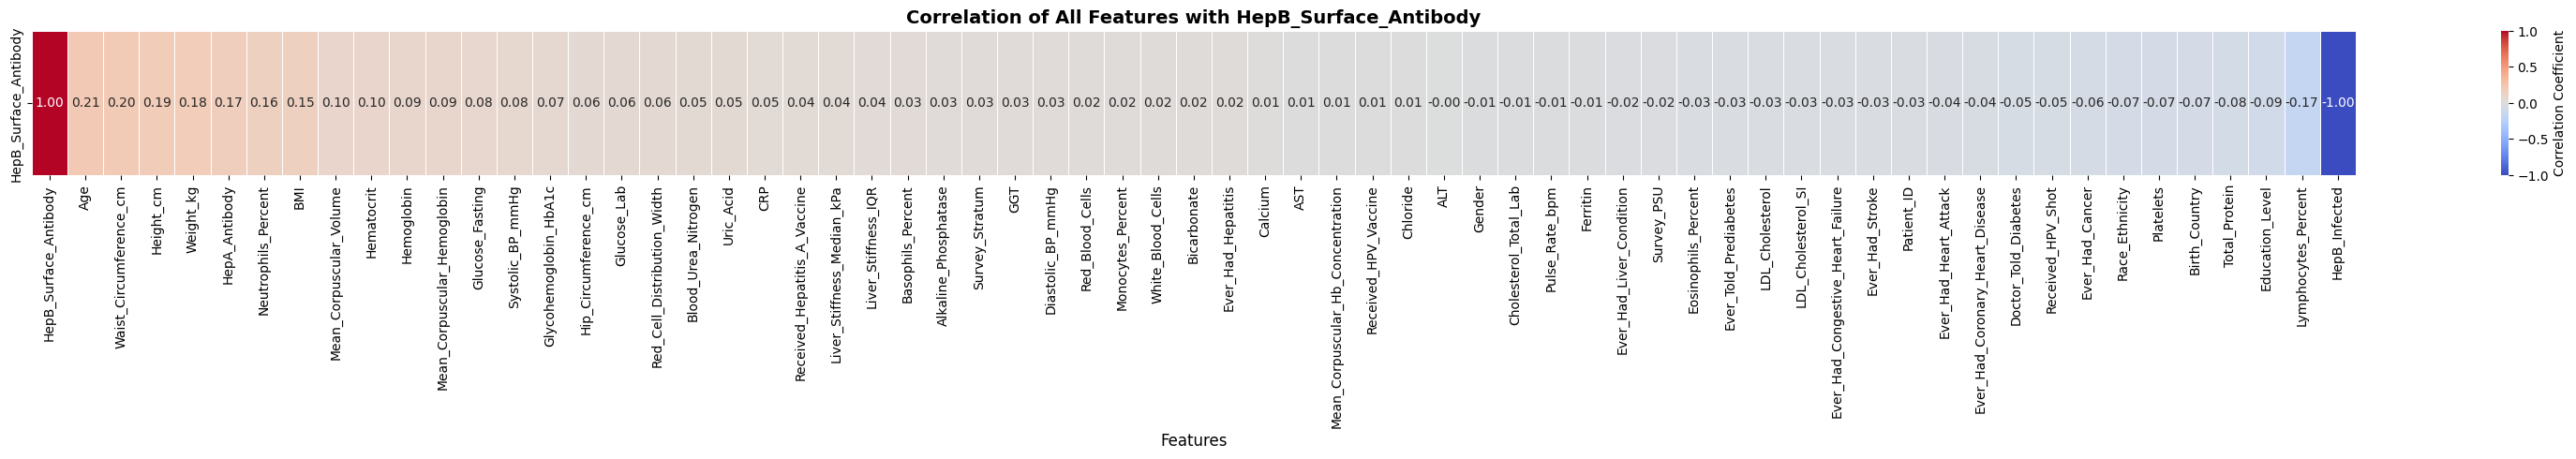


Correlation with Target (HepB_Surface_Antibody):
HepB_Surface_Antibody     1.000000
Age                       0.214495
Waist_Circumference_cm    0.202188
Height_cm                 0.190217
Weight_kg                 0.183964
                            ...   
Birth_Country            -0.067786
Total_Protein            -0.076804
Education_Level          -0.088315
Lymphocytes_Percent      -0.169024
HepB_Infected            -1.000000
Name: HepB_Surface_Antibody, Length: 65, dtype: float64

⚠️ Weak Correlation Features (|corr| < 0.1): 54 features
Hematocrit                           0.095003
Hemoglobin                           0.090273
Mean_Corpuscular_Hemoglobin          0.089533
Glucose_Fasting                      0.078370
Systolic_BP_mmHg                     0.077707
Glycohemoglobin_HbA1c                0.070223
Hip_Circumference_cm                 0.062129
Glucose_Lab                          0.062010
Red_Cell_Distribution_Width          0.059572
Blood_Urea_Nitrogen                  

In [3]:
# ============================================================================
# 📈 SECTION 3: CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*90)
print("📈 CORRELATION ANALYSIS")
print("="*90)

# 3.1 Full Correlation Heatmap
print("\n🔍 Generating full correlation heatmap...")
corr_matrix = df.corr()
plt.figure(figsize=(35, 32))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (All Features)", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

# 3.2 Correlation with Target (HepB_Infected)
correlations = df.corr()['HepB_Infected'].drop('HepB_Infected').sort_values(ascending=False)
print("\n🔝 Top 25 Positive Correlations with HepB_Infected:")
print(correlations.head(25))
print("\n🔻 Top 25 Negative Correlations with HepB_Infected:")
print(correlations.tail(25))

# 3.3 Top Features Heatmap
top_features = correlations.abs().nlargest(25).index.tolist() + ['HepB_Infected']
plt.figure(figsize=(24, 10))
sns.heatmap(df[top_features].corr(), annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap (Top 25 Features)', fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 3.4 Correlation with HepB_Surface_Antibody
target = 'HepB_Surface_Antibody'
correlation_with_target = df.corr()[target].sort_values(ascending=False)
corr_df = pd.DataFrame(correlation_with_target).T

plt.figure(figsize=(40, 2))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'},
            linewidths=0.5)
plt.title(f'Correlation of All Features with {target}', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"Correlation with Target ({target}):")
print(f"{'='*60}")
print(correlation_with_target)

weak_features = correlation_with_target[abs(correlation_with_target) < 0.1]
print(f"\n⚠️ Weak Correlation Features (|corr| < 0.1): {len(weak_features)} features")
print(weak_features)



📊 CLASS DISTRIBUTION ANALYSIS


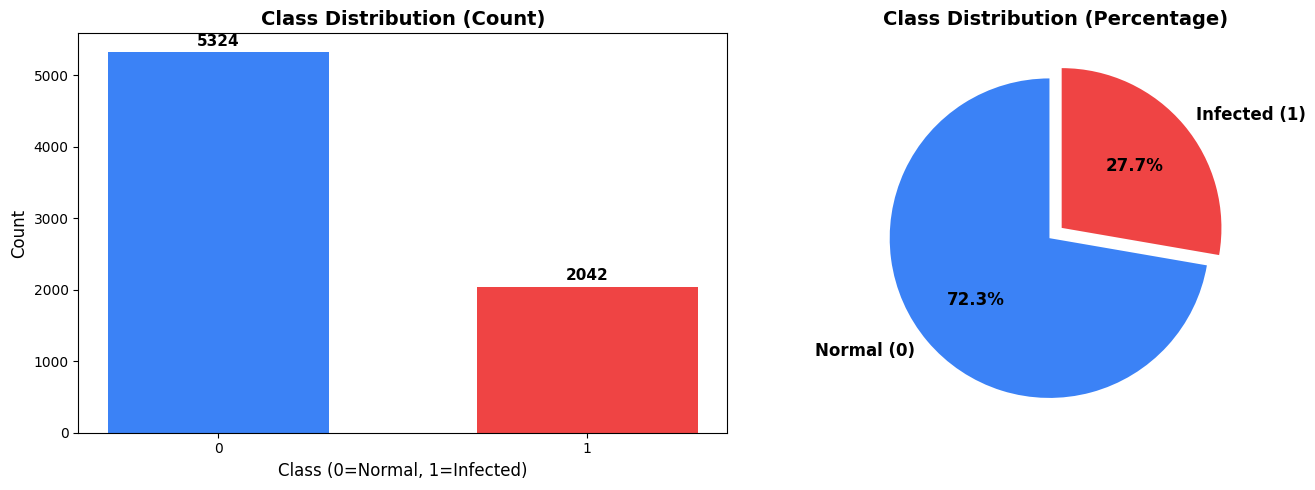


📊 Class Distribution:
HepB_Infected
0.0    5324
1.0    2042
Name: count, dtype: int64

📊 Class Distribution (%):
HepB_Infected
0.0    72.278034
1.0    27.721966
Name: proportion, dtype: float64


In [4]:
# ============================================================================
# 📊 SECTION 4: CLASS DISTRIBUTION ANALYSIS
# ============================================================================
print("\n" + "="*90)
print("📊 CLASS DISTRIBUTION ANALYSIS")
print("="*90)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count Plot
class_counts = df['HepB_Infected'].value_counts().sort_index()
axes[0].bar([0, 1], class_counts.values, color=['#3b82f6', '#ef4444'], width=0.6)
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Normal, 1=Infected)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticks([0, 1])

for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + max(class_counts.values)*0.01, str(v), 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie Chart
colors = ['#3b82f6', '#ef4444']
explode = (0.05, 0.05)
axes[1].pie(class_counts, labels=['Normal (0)', 'Infected (1)'], 
            autopct='%1.1f%%', colors=colors, explode=explode,
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Class Distribution:")
print(df['HepB_Infected'].value_counts())
print(f"\n📊 Class Distribution (%):")
print(df['HepB_Infected'].value_counts(normalize=True) * 100)


In [5]:
# ============================================================================
# 🧹 SECTION 5: MISSING VALUES & FEATURE DROPPING
# ============================================================================
print("\n" + "="*90)
print("🧹 MISSING VALUES ANALYSIS")
print("="*90)

missing = df.isna().mean().sort_values(ascending=False) * 100
print("\n⚠️ Top Features with Missing Values:")
print(missing[missing > 0].head(20))

# Drop features with > 60% missing
threshold = 0.60
cols_to_drop = missing[missing > threshold*100].index
print(f"\n🗑️ Dropping {len(cols_to_drop)} features with >{threshold*100}% missing values")

# Define columns to drop based on correlation & redundancy
columns_to_drop = [
    # IDs & Survey Info
    'Patient_ID', 'Survey_PSU', 'Survey_Stratum',
    
    # Redundant Features (High Multicollinearity)
    'Waist_Circumference_cm', 'Height_cm', 'Hematocrit',
    'Lymphocytes_Percent', 'Mean_Corpuscular_Hemoglobin',
    
    # Weak Correlation with Target (< 0.10)
    'Education_Level', 'Glucose_Fasting', 'Hemoglobin',
    'Mean_Corpuscular_Volume', 'Mean_Corpuscular_Hb_Concentration',
    
    # Very Weak Features (< 0.05)
    'Ferritin', 'Hip_Circumference_cm', 'Liver_Stiffness_IQR',
    'LDL_Cholesterol', 'LDL_Cholesterol_SI', 'Glucose_Lab',
    'Received_HPV_Shot', 'Received_HPV_Vaccine',
    
    # Target Variable
    'HepB_Surface_Antibody'
]

df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

print("=" * 60)
print(f"✅ Original Features: {len(df.columns)}")
print(f"✅ Dropped Features: {len(columns_to_drop)}")
print(f"✅ Remaining Features: {len(df_cleaned.columns)}")
print("=" * 60)
print("\n✅ Remaining Features:")
print(df_cleaned.columns.tolist())

df = df_cleaned.copy()



🧹 MISSING VALUES ANALYSIS

⚠️ Top Features with Missing Values:
Ferritin                      83.658761
Received_HPV_Shot             79.108355
Received_HPV_Vaccine          76.091511
LDL_Cholesterol_SI            70.837174
LDL_Cholesterol               70.837174
Glucose_Fasting               69.228191
AST                           47.138188
ALT                           47.029247
Bicarbonate                   46.995726
Blood_Urea_Nitrogen           46.987346
GGT                           46.978966
Alkaline_Phosphatase          46.978966
Cholesterol_Total_Lab         46.970586
Uric_Acid                     46.962206
Chloride                      46.962206
Glucose_Lab                   46.727562
Calcium                       46.685662
Total_Protein                 46.668901
Liver_Stiffness_IQR           43.962122
Liver_Stiffness_Median_kPa    43.853180
dtype: float64

🗑️ Dropping 6 features with >60.0% missing values
✅ Original Features: 65
✅ Dropped Features: 22
✅ Remaining Features: 

In [6]:
# ============================================================================
# 🎯 SECTION 6: TRAIN-TEST SPLIT & TARGET PREPARATION
# ============================================================================
print("\n" + "="*90)
print("🎯 PREPARING TRAIN-TEST SPLIT")
print("="*90)

# Remove rows with missing target
df.dropna(subset=['HepB_Infected'], inplace=True)
print(f"✅ Removed rows with missing target. New shape: {df.shape}")

# Split features and target
X = df.iloc[:, :-1].copy()
Y = df.iloc[:, -1].copy()

print(f"\n✅ Features (X) shape: {X.shape}")
print(f"✅ Target (Y) shape: {Y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

print(f"\n📊 Train set: {X_train.shape}")
print(f"📊 Test set: {X_test.shape}")



🎯 PREPARING TRAIN-TEST SPLIT
✅ Removed rows with missing target. New shape: (7366, 43)

✅ Features (X) shape: (7366, 42)
✅ Target (Y) shape: (7366,)

📊 Train set: (5892, 42)
📊 Test set: (1474, 42)



🔍 GENERATING SCATTER PLOTS


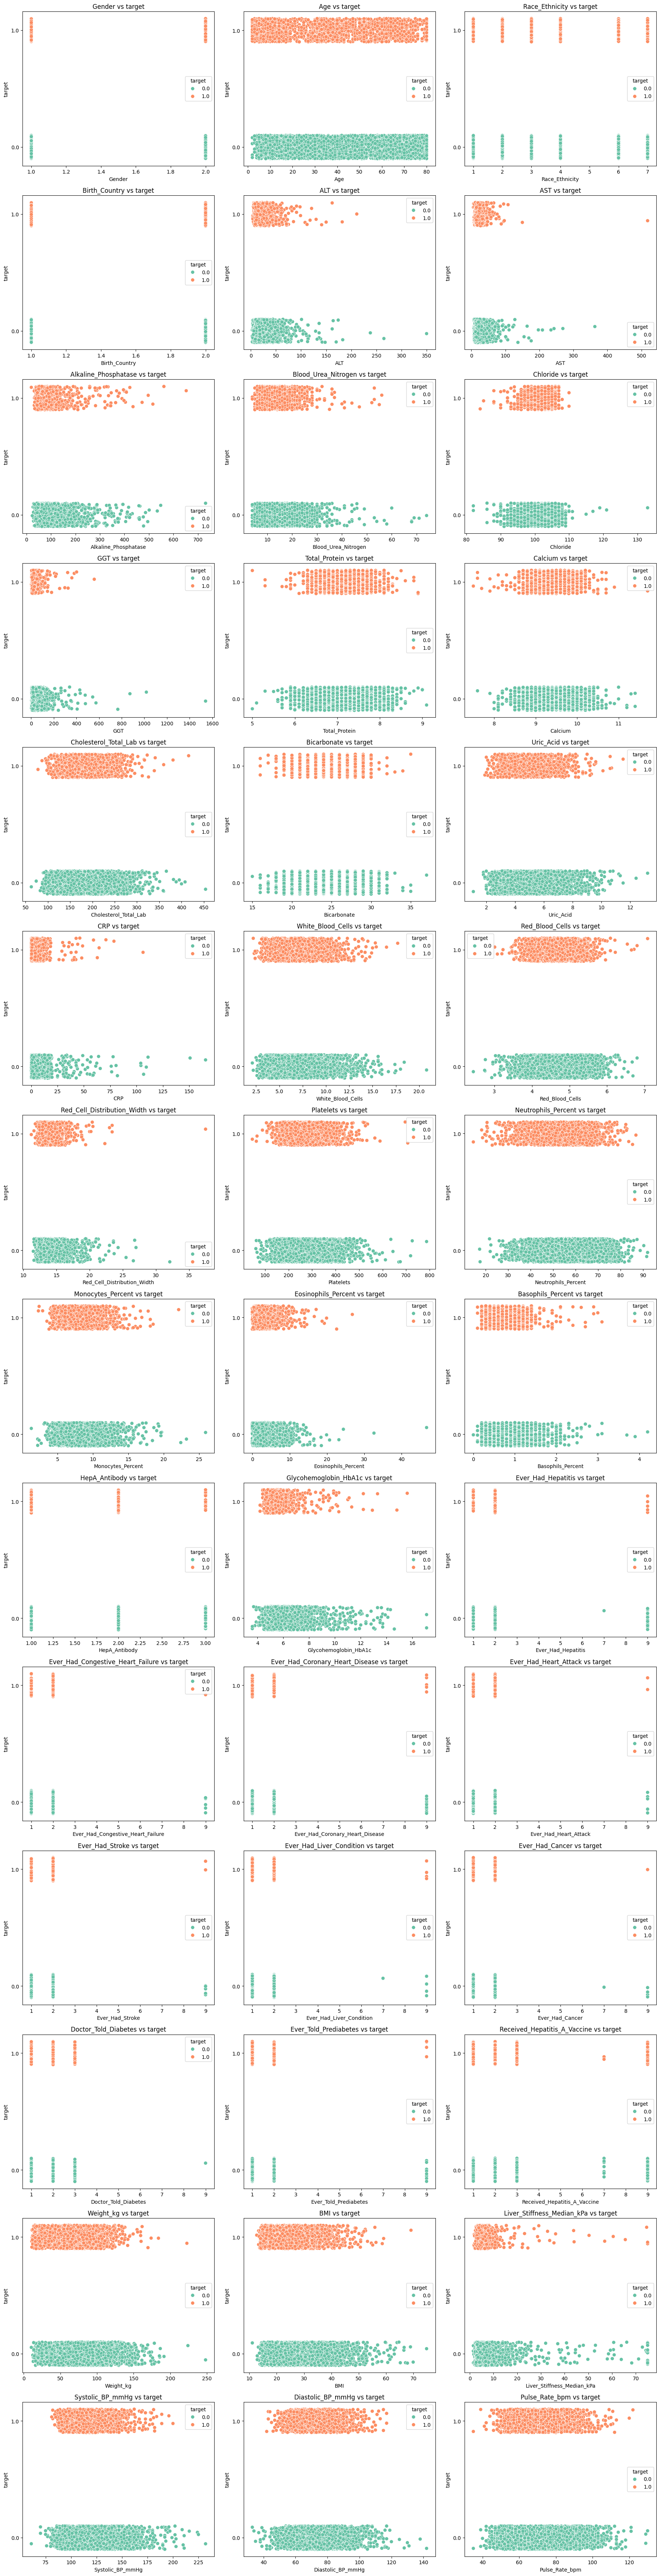

In [7]:
# ============================================================================
# 🔍 SECTION 7: SCATTER PLOTS (FEATURE vs TARGET)
# ============================================================================
print("\n" + "="*90)
print("🔍 GENERATING SCATTER PLOTS")
print("="*90)

import math
classes = Y.unique()
class_dict = {cls: i for i, cls in enumerate(classes)}
y_numeric_base = Y.map(class_dict)

cols = X.columns
n = len(cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    y_numeric = y_numeric_base + np.random.uniform(-0.1, 0.1, size=len(Y))
    sns.scatterplot(x=X[col], y=y_numeric, hue=Y, palette='Set2', s=50)
    plt.yticks(list(class_dict.values()), list(class_dict.keys()))
    plt.xlabel(col)
    plt.ylabel('target')
    plt.title(f'{col} vs target')
    plt.legend(title='target')

plt.tight_layout()
plt.show()



🎨 ADVANCED VISUALIZATIONS


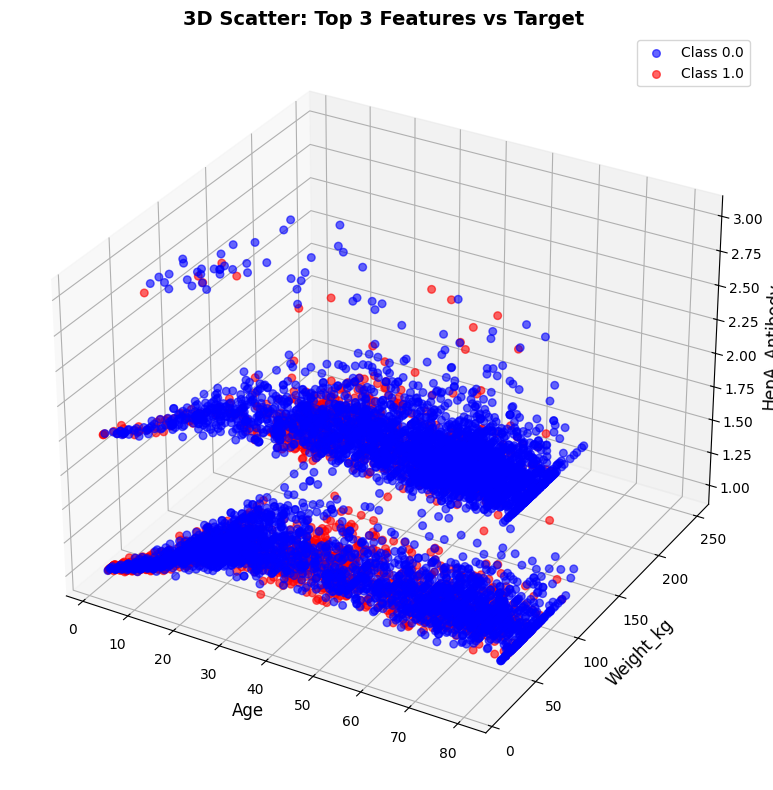

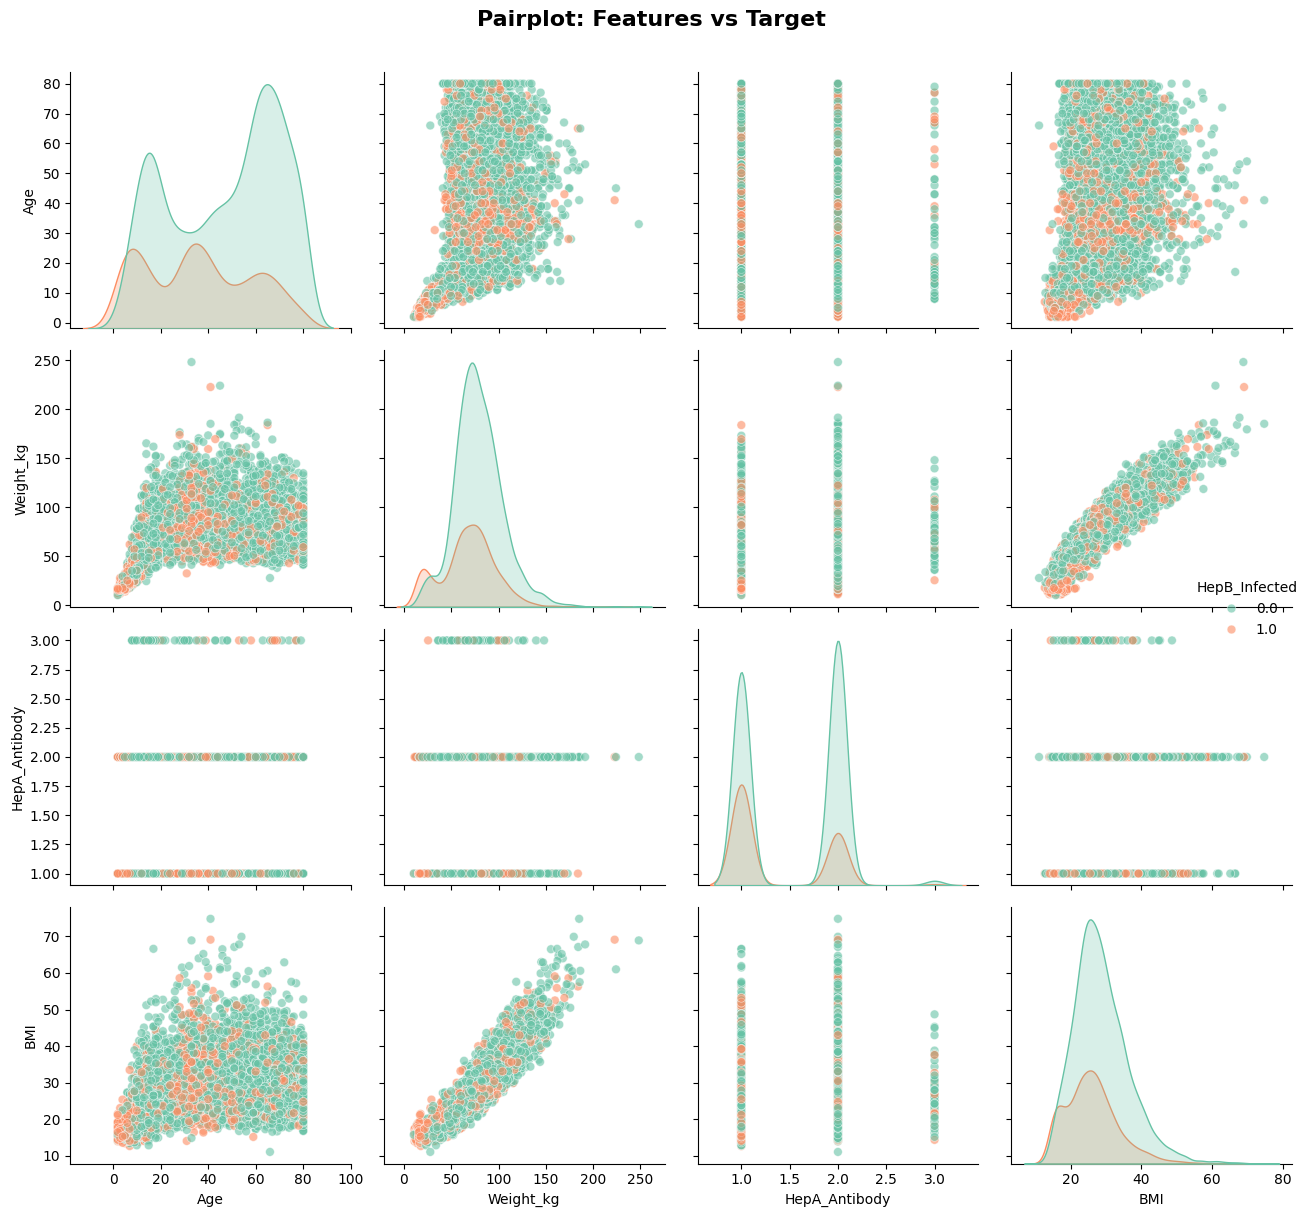

In [8]:
# ============================================================================
# 🎨 SECTION 8: 3D & PAIRPLOT VISUALIZATIONS
# ============================================================================
print("\n" + "="*90)
print("🎨 ADVANCED VISUALIZATIONS")
print("="*90)

from itertools import combinations

# 3D Scatter Plot
top_features_3d = ['Age', 'Weight_kg', 'HepA_Antibody']
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors_map = {0: 'blue', 1: 'red'}
for target_class in Y.unique():
    mask = Y == target_class
    ax.scatter(X.loc[mask, top_features_3d[0]], 
                X.loc[mask, top_features_3d[1]], 
                X.loc[mask, top_features_3d[2]], 
                c=colors_map.get(target_class, 'gray'),
                label=f'Class {target_class}', 
                s=30, alpha=0.6)

ax.set_xlabel(top_features_3d[0], fontsize=12)
ax.set_ylabel(top_features_3d[1], fontsize=12)
ax.set_zlabel(top_features_3d[2], fontsize=12)
ax.set_title('3D Scatter: Top 3 Features vs Target', fontsize=14, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

# Pairplot
selected_features = ['Age', 'Weight_kg', 'HepA_Antibody', 'BMI']
df_plot = pd.concat([X[selected_features], Y], axis=1)
sns.pairplot(df_plot, hue=Y.name, palette='Set2', diag_kind='kde', 
                plot_kws={'alpha': 0.6, 's': 40}, height=3)
plt.suptitle('Pairplot: Features vs Target', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [9]:
# ============================================================================
# 🧪 SECTION 9: DATA PREPROCESSING
# ============================================================================
print("\n" + "="*90)
print("🧪 DATA PREPROCESSING")
print("="*90)

# 9.1 Define categorical columns
categorical_cols = [
    'Gender', 'Race_Ethnicity', 'Birth_Country',
    'Ever_Had_Cancer', 'Doctor_Told_Diabetes', 'Ever_Told_Prediabetes',
    'Received_Hepatitis_A_Vaccine'
]
numeric_cols_to_impute = [col for col in X_train.columns if col not in categorical_cols]

# 9.2 Handle unknown values in categorical features
unknown_values = {
    'Ever_Had_Cancer': [7.0, 9.0],
    'Doctor_Told_Diabetes': [3.0],
    'Ever_Told_Prediabetes': [9.0],
    'Received_Hepatitis_A_Vaccine': [2.0, 7.0, 9.0]
}

for col, values in unknown_values.items():
    if col in X_train.columns:
        X_train[col] = X_train[col].replace(values, np.nan)
        X_test[col] = X_test[col].replace(values, np.nan)

# 9.3 Impute numeric features
print("\n📊 Imputing numeric features with mean...")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train[numeric_cols_to_impute])
X_train[numeric_cols_to_impute] = imputer.transform(X_train[numeric_cols_to_impute])
X_test[numeric_cols_to_impute] = imputer.transform(X_test[numeric_cols_to_impute])

# 9.4 Impute categorical features
print("📊 Imputing categorical features with most frequent...")
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(X_train[categorical_cols])
X_train[categorical_cols] = cat_imputer.transform(X_train[categorical_cols])
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

print(f"\n✅ Missing values in X_train: {X_train.isna().sum().sum()}")
print(f"✅ Missing values in X_test: {X_test.isna().sum().sum()}")


🧪 DATA PREPROCESSING

📊 Imputing numeric features with mean...
📊 Imputing categorical features with most frequent...

✅ Missing values in X_train: 0
✅ Missing values in X_test: 0


In [10]:
# ============================================================================
# 🔧 SECTION 10: OUTLIER DETECTION & HANDLING
# ============================================================================
print("\n" + "="*90)
print("🔧 OUTLIER DETECTION & HANDLING")
print("="*90)

X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

numeric_continuous = [col for col in numeric_cols_to_impute if col in X_train_df.columns]

# Calculate outlier bounds from training set
bounds = {}
outlier_counts = []

for col in numeric_continuous:
    Q1 = X_train_df[col].quantile(0.25)
    Q3 = X_train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bounds[col] = (lower_bound, upper_bound)
    
    count_outliers = ((X_train_df[col] < lower_bound) | (X_train_df[col] > upper_bound)).sum()
    outlier_counts.append({'Feature': col, 'Outlier_Count': count_outliers})

print("\n🔍 Outliers before clipping:")
print(pd.DataFrame(outlier_counts).sort_values('Outlier_Count', ascending=False).head(10))

# Clip outliers
for col in numeric_continuous:
    lower_bound, upper_bound = bounds[col]
    X_train_df[col] = X_train_df[col].clip(lower=lower_bound, upper=upper_bound)
    X_test_df[col] = X_test_df[col].clip(lower=lower_bound, upper=upper_bound)

print("✅ Outliers clipped successfully!")

X_train = X_train_df.values
X_test = X_test_df.values


🔧 OUTLIER DETECTION & HANDLING

🔍 Outliers before clipping:
                        Feature  Outlier_Count
12                          CRP            520
22        Glycohemoglobin_HbA1c            494
6                           GGT            457
2                           AST            427
31   Liver_Stiffness_Median_kPa            425
3          Alkaline_Phosphatase            419
1                           ALT            410
15  Red_Cell_Distribution_Width            336
19          Eosinophils_Percent            304
4           Blood_Urea_Nitrogen            300
✅ Outliers clipped successfully!


In [11]:
# ============================================================================
# 📏 SECTION 11: FEATURE SCALING
# ============================================================================
print("\n" + "="*90)
print("📏 FEATURE SCALING")
print("="*90)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ StandardScaler applied successfully!")
print(f"   Train shape: {X_train_scaled.shape}")
print(f"   Test shape: {X_test_scaled.shape}")


📏 FEATURE SCALING
✅ StandardScaler applied successfully!
   Train shape: (5892, 42)
   Test shape: (1474, 42)


In [12]:
# ============================================================================
# ⚖️ SECTION 12: CLASS DISTRIBUTION CHECK
# ============================================================================
print("\n" + "="*90)
print("⚖️ CLASS DISTRIBUTION CHECK")
print("="*90)

train_class_counts = pd.Series(y_train).value_counts()
train_class_percent = pd.Series(y_train).value_counts(normalize=True) * 100

print("📊 Train class distribution:")
print(train_class_counts)
print("\n📊 Train class percentages:")
print(train_class_percent)

test_class_counts = pd.Series(y_test).value_counts()
test_class_percent = pd.Series(y_test).value_counts(normalize=True) * 100

print("\n📊 Test class distribution:")
print(test_class_counts)
print("\n📊 Test class percentages:")
print(test_class_percent)

print("\n" + "="*90)
print("✅ PREPROCESSING COMPLETE - READY FOR MODELING!")
print("="*90)


⚖️ CLASS DISTRIBUTION CHECK
📊 Train class distribution:
HepB_Infected
0.0    4259
1.0    1633
Name: count, dtype: int64

📊 Train class percentages:
HepB_Infected
0.0    72.284453
1.0    27.715547
Name: proportion, dtype: float64

📊 Test class distribution:
HepB_Infected
0.0    1065
1.0     409
Name: count, dtype: int64

📊 Test class percentages:
HepB_Infected
0.0    72.252374
1.0    27.747626
Name: proportion, dtype: float64

✅ PREPROCESSING COMPLETE - READY FOR MODELING!


# MODELING AND EVALUATION 
====================================================================================
                    PART 2: MODELING EXPERIMENTS
====================================================================================
This section contains all modeling experiments with different strategies:
1. Extreme Optimization (Multiple Strategies)
2. High Precision + High Recall Optimization
3. Feature Engineering Approach
4. Hyperparameter Tuning with Optuna

====================================================================================
"""


## EXPERIMENT 1: EXTREME OPTIMIZATION (80-90% ON ALL METRICS)

In [ ]:
# ============================================================================
# 🚀 EXPERIMENT 1: EXTREME OPTIMIZATION (80-90% ON ALL METRICS)
# ============================================================================
print("="*90)
print("🚀 EXPERIMENT 1: EXTREME OPTIMIZATION")
print("="*90)

In [ ]:
# ----------------------------------------------------------------------------
# 1.1 Feature Engineering & Selection
# ----------------------------------------------------------------------------
print("\n" + "="*90)
print("🔬 STEP 1: Advanced Feature Engineering")
print("="*90)

# SelectKBest with F-score
selector_f = SelectKBest(f_classif, k=35)
X_train_selected_f = selector_f.fit_transform(X_train_scaled, y_train)
X_test_selected_f = selector_f.transform(X_test_scaled)

# SelectKBest with Mutual Information
selector_mi = SelectKBest(mutual_info_classif, k=35)
X_train_selected_mi = selector_mi.fit_transform(X_train_scaled, y_train)
X_test_selected_mi = selector_mi.transform(X_test_scaled)

# Use mutual info (usually better)
X_train_fs = X_train_selected_mi
X_test_fs = X_test_selected_mi

print(f"✅ Selected {X_train_fs.shape[1]} most important features")

# Robust Scaling
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train_fs)
X_test_robust = robust_scaler.transform(X_test_fs)

print(f"✅ Applied Robust Scaling (resistant to outliers)")


In [ ]:
# ----------------------------------------------------------------------------
# 1.2 Multi-Strategy Resampling
# ----------------------------------------------------------------------------
print("\n" + "="*90)
print("🔬 STEP 2: Multi-Strategy Resampling")
print("="*90)

# Strategy 1: SMOTEENN
print("\n🔄 Strategy 1: SMOTEENN")
smoteenn = SMOTEENN(
    smote=SMOTE(sampling_strategy=0.85, k_neighbors=5, random_state=42),
    enn=EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=5)
)
X_train_s1, y_train_s1 = smoteenn.fit_resample(X_train_robust, y_train)
print(f"   Class distribution: {pd.Series(y_train_s1).value_counts().to_dict()}")

# Strategy 2: BorderlineSMOTE + Tomek
print("\n🔄 Strategy 2: BorderlineSMOTE + Tomek")
borderline_smote = BorderlineSMOTE(sampling_strategy=0.85, k_neighbors=5, random_state=42)
X_train_border, y_train_border = borderline_smote.fit_resample(X_train_robust, y_train)
tomek = TomekLinks(sampling_strategy='majority')
X_train_s2, y_train_s2 = tomek.fit_resample(X_train_border, y_train_border)
print(f"   Class distribution: {pd.Series(y_train_s2).value_counts().to_dict()}")

# Strategy 3: ADASYN
print("\n🔄 Strategy 3: ADASYN")
adasyn = ADASYN(sampling_strategy=0.85, n_neighbors=5, random_state=42)
X_train_s3, y_train_s3 = adasyn.fit_resample(X_train_robust, y_train)
print(f"   Class distribution: {pd.Series(y_train_s3).value_counts().to_dict()}")

# Use SMOTEENN (usually best)
X_train_final = X_train_s1
y_train_final = y_train_s1

print(f"\n✅ Final resampled data: {X_train_final.shape}")


In [ ]:
# ----------------------------------------------------------------------------
# 1.3 Extreme Class Weights
# ----------------------------------------------------------------------------
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_extreme = {0: class_weights[0] * 0.8, 1: class_weights[1] * 2.5}
print(f"\n⚖️ Extreme Class Weights: {class_weight_extreme}")


In [ ]:
# ----------------------------------------------------------------------------
# 1.4 Ultra-Optimized Models
# ----------------------------------------------------------------------------
print("\n" + "="*90)
print("🔬 STEP 3: Building Ultra-Optimized Models")
print("="*90)

# XGBoost Extreme
xgb_extreme = XGBClassifier(
    n_estimators=500, max_depth=7, learning_rate=0.02,
    min_child_weight=1, subsample=0.9, colsample_bytree=0.9,
    gamma=0.05, reg_alpha=0.01, reg_lambda=0.5,
    scale_pos_weight=2.5, random_state=42,
    eval_metric='logloss', tree_method='hist', n_jobs=-1
)

# CatBoost Extreme
cat_extreme = CatBoostClassifier(
    iterations=500, depth=7, learning_rate=0.02,
    l2_leaf_reg=1, border_count=254,
    auto_class_weights='SqrtBalanced',
    bootstrap_type='Bayesian', bagging_temperature=0.5,
    random_seed=42, verbose=0, thread_count=-1
)

# LightGBM Extreme
lgb_extreme = LGBMClassifier(
    n_estimators=500, max_depth=7, learning_rate=0.02,
    num_leaves=40, min_child_samples=20,
    subsample=0.9, colsample_bytree=0.9,
    reg_alpha=0.01, reg_lambda=0.5, min_split_gain=0.01,
    is_unbalance=True, boosting_type='gbdt',
    random_state=42, verbose=-1, n_jobs=-1
)

# Random Forest Extreme
rf_extreme = RandomForestClassifier(
    n_estimators=500, max_depth=15,
    min_samples_split=8, min_samples_leaf=4,
    max_features='sqrt', class_weight='balanced_subsample',
    bootstrap=True, oob_score=True,
    random_state=42, n_jobs=-1
)

# ExtraTrees Extreme
et_extreme = ExtraTreesClassifier(
    n_estimators=500, max_depth=15,
    min_samples_split=8, min_samples_leaf=4,
    max_features='sqrt', class_weight='balanced_subsample',
    bootstrap=True, random_state=42, n_jobs=-1
)

# Gradient Boosting Extreme
gb_extreme = GradientBoostingClassifier(
    n_estimators=400, max_depth=6, learning_rate=0.02,
    min_samples_split=12, min_samples_leaf=6,
    subsample=0.9, max_features='sqrt', random_state=42
)

# AdaBoost Extreme
ada_extreme = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=300, learning_rate=0.5, random_state=42
)

In [ ]:
# ----------------------------------------------------------------------------
# 1.5 Multi-Level Ensemble
# ----------------------------------------------------------------------------
print("\n🔥 Building Multi-Level Stacking Ensemble...")

level1_models = [
    ('xgb', xgb_extreme),
    ('cat', cat_extreme),
    ('lgb', lgb_extreme),
    ('rf', rf_extreme),
    ('et', et_extreme)
]

meta_learner = XGBClassifier(
    n_estimators=200, max_depth=4, learning_rate=0.05,
    scale_pos_weight=2.0, random_state=42
)

stacking_mega = StackingClassifier(
    estimators=level1_models,
    final_estimator=meta_learner,
    cv=7, stack_method='predict_proba', n_jobs=-1
)

print("🔥 Building Advanced Weighted Voting Ensemble...")

voting_mega = VotingClassifier(
    estimators=level1_models + [('gb', gb_extreme), ('ada', ada_extreme)],
    voting='soft',
    weights=[1.5, 1.5, 1.4, 1.2, 1.2, 1.0, 0.8],
    n_jobs=-1
)

print("🔥 Building Bagging Ensembles...")

bagging_xgb = BaggingClassifier(
    estimator=xgb_extreme, n_estimators=20,
    max_samples=0.9, max_features=0.9,
    random_state=42, n_jobs=-1
)

bagging_cat = BaggingClassifier(
    estimator=cat_extreme, n_estimators=20,
    max_samples=0.9, max_features=0.9,
    random_state=42, n_jobs=-1
)

In [ ]:
# ----------------------------------------------------------------------------
# 1.6 Training & Evaluation
# ----------------------------------------------------------------------------
cv_strategy = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

models_to_evaluate = {
    'XGBoost Extreme': xgb_extreme,
    'CatBoost Extreme': cat_extreme,
    'LightGBM Extreme': lgb_extreme,
    'Random Forest Extreme': rf_extreme,
    'ExtraTrees Extreme': et_extreme,
    'Gradient Boosting Extreme': gb_extreme,
    'AdaBoost Extreme': ada_extreme,
    '🌟 Bagging XGBoost': bagging_xgb,
    '🌟 Bagging CatBoost': bagging_cat,
    '⭐ Mega Stacking Ensemble': stacking_mega,
    '⭐ Mega Voting Ensemble': voting_mega
}

results_exp1 = []
best_overall_model = None
best_overall_score = 0

for model_name, model in models_to_evaluate.items():
    print(f"\n{'='*90}")
    print(f"🔥 Training: {model_name}")
    print('='*90)

    try:
        # Cross Validation
        print("   Running 7-Fold Cross Validation...")
        cv_scores = cross_validate(
            model, X_train_final, y_train_final,
            cv=cv_strategy,
            scoring={'recall': 'recall', 'precision': 'precision',
                    'f1': 'f1', 'accuracy': 'accuracy', 'roc_auc': 'roc_auc'},
            n_jobs=-1, return_train_score=False
        )

        print(f"   📊 CV Results:")
        print(f"      Recall:    {cv_scores['test_recall'].mean():.4f} (±{cv_scores['test_recall'].std():.4f})")
        print(f"      Precision: {cv_scores['test_precision'].mean():.4f} (±{cv_scores['test_precision'].std():.4f})")
        print(f"      F1:        {cv_scores['test_f1'].mean():.4f} (±{cv_scores['test_f1'].std():.4f})")
        print(f"      Accuracy:  {cv_scores['test_accuracy'].mean():.4f} (±{cv_scores['test_accuracy'].std():.4f})")

        # Training
        print("   Training final model...")
        model.fit(X_train_final, y_train_final)

        # Threshold Optimization
        print("   Optimizing threshold (range: 0.25-0.70)...")
        y_proba = model.predict_proba(X_test_robust)[:, 1]

        best_threshold = 0.5
        best_f1 = 0
        best_metrics = {}

        for threshold in np.arange(0.25, 0.70, 0.02):
            y_pred_temp = (y_proba >= threshold).astype(int)

            try:
                recall_temp = recall_score(y_test, y_pred_temp)
                precision_temp = precision_score(y_test, y_pred_temp)
                f1_temp = f1_score(y_test, y_pred_temp)
                acc_temp = accuracy_score(y_test, y_pred_temp)

                custom_score = f1_temp + 0.1 * min(recall_temp, precision_temp)

                if custom_score > best_f1:
                    best_f1 = custom_score
                    best_threshold = threshold
                    best_metrics = {
                        'recall': recall_temp,
                        'precision': precision_temp,
                        'f1': f1_temp,
                        'accuracy': acc_temp
                    }
            except:
                continue

        print(f"   ✅ Optimal Threshold: {best_threshold:.3f}")

        # Final predictions
        y_pred_final = (y_proba >= best_threshold).astype(int)

        # Calculate metrics
        test_accuracy = accuracy_score(y_test, y_pred_final)
        test_recall = recall_score(y_test, y_pred_final)
        test_precision = precision_score(y_test, y_pred_final)
        test_f1 = f1_score(y_test, y_pred_final)
        test_roc_auc = roc_auc_score(y_test, y_proba)

        print(f"\n   ✅ Test Results (Threshold={best_threshold:.3f}):")
        print(f"      Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
        print(f"      Recall:    {test_recall:.4f} ({test_recall*100:.2f}%) 🎯")
        print(f"      Precision: {test_precision:.4f} ({test_precision*100:.2f}%) 🎯")
        print(f"      F1-Score:  {test_f1:.4f} ({test_f1*100:.2f}%) ⭐")
        print(f"      ROC-AUC:   {test_roc_auc:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred_final)
        tn, fp, fn, tp = cm.ravel()

        print(f"\n   📊 Confusion Matrix:")
        print(f"      TN: {tn:4d}  |  FP: {fp:4d}")
        print(f"      FN: {fn:4d}  |  TP: {tp:4d}")
        print(f"\n      Missed (FN):      {fn} 🚨  ({fn/(fn+tp)*100:.1f}%)")
        print(f"      Detected (TP):    {tp} ✅  ({tp/(fn+tp)*100:.1f}%)")
        print(f"      False Alarms (FP): {fp} ⚠️  ({fp/(fp+tn)*100:.1f}%)")

        # Save results
        results_exp1.append({
            'Model': model_name,
            'Threshold': best_threshold,
            'Accuracy': test_accuracy,
            'Recall': test_recall,
            'Precision': test_precision,
            'F1': test_f1,
            'ROC_AUC': test_roc_auc,
            'FN': fn, 'FP': fp, 'TP': tp, 'TN': tn
        })

        if test_f1 > best_overall_score:
            best_overall_score = test_f1
            best_overall_model = {
                'name': model_name,
                'model': model,
                'threshold': best_threshold,
                'metrics': {
                    'accuracy': test_accuracy,
                    'recall': test_recall,
                    'precision': test_precision,
                    'f1': test_f1,
                    'roc_auc': test_roc_auc
                }
            }

    except Exception as e:
        print(f"   ❌ Error: {str(e)}")
        continue

In [ ]:
# ----------------------------------------------------------------------------
# 1.7 Results Summary
# ----------------------------------------------------------------------------
print("\n" + "="*100)
print("🏆 EXPERIMENT 1: FINAL RESULTS")
print("="*100)

results_df_exp1 = pd.DataFrame(results_exp1)
results_df_exp1['AVG_Score'] = (results_df_exp1['Accuracy'] + results_df_exp1['Recall'] +
                                 results_df_exp1['Precision'] + results_df_exp1['F1']) / 4
results_df_exp1 = results_df_exp1.sort_values('F1', ascending=False)

print("\n📊 All Models Performance:")
print(results_df_exp1[['Model', 'Threshold', 'Accuracy', 'Recall', 'Precision',
                       'F1', 'ROC_AUC', 'FN', 'FP']].to_string(index=False))

print("\n" + "="*100)
print("🥇 TOP 5 MODELS - EXPERIMENT 1")
print("="*100)

for i in range(min(5, len(results_df_exp1))):
    row = results_df_exp1.iloc[i]
    print(f"\n{'='*90}")
    print(f"#{i+1} {row['Model']}")
    print(f"{'='*90}")
    print(f"   🎯 Threshold:     {row['Threshold']:.3f}")
    print(f"   📈 Accuracy:      {row['Accuracy']:.4f} ({row['Accuracy']*100:.2f}%)")
    print(f"   🎯 Recall:        {row['Recall']:.4f} ({row['Recall']*100:.2f}%)")
    print(f"   🎯 Precision:     {row['Precision']:.4f} ({row['Precision']*100:.2f}%)")
    print(f"   ⭐ F1-Score:      {row['F1']:.4f} ({row['F1']*100:.2f}%)")
    print(f"   📊 ROC-AUC:       {row['ROC_AUC']:.4f}")
    print(f"   💯 Average Score: {row['AVG_Score']:.4f} ({row['AVG_Score']*100:.2f}%)")


## EXPERIMENT 2: HIGH PRECISION + HIGH RECALL OPTIMIZATION

In [ ]:
# ============================================================================
# 🎯 EXPERIMENT 2: HIGH PRECISION + HIGH RECALL OPTIMIZATION
# ============================================================================
print("\n\n" + "="*90)
print("🎯 EXPERIMENT 2: HIGH PRECISION + HIGH RECALL OPTIMIZATION")
print("="*90)


In [ ]:
# ----------------------------------------------------------------------------
# 2.1 Feature Selection
# ----------------------------------------------------------------------------
print("\n" + "="*90)
print("🔬 STEP 1: Advanced Feature Selection")
print("="*90)

selector_mi_exp2 = SelectKBest(mutual_info_classif, k=38)
X_train_mi_exp2 = selector_mi_exp2.fit_transform(X_train_scaled, y_train)
X_test_mi_exp2 = selector_mi_exp2.transform(X_test_scaled)

print(f"✅ Selected {X_train_mi_exp2.shape[1]} most important features (Mutual Information)")

In [ ]:
# ----------------------------------------------------------------------------
# 2.2 Hybrid Resampling
# ----------------------------------------------------------------------------
print("\n" + "="*90)
print("🔬 STEP 2: Hybrid Resampling (SMOTE + Under-sampling)")
print("="*90)

smote_moderate = SMOTE(sampling_strategy=0.50, k_neighbors=5, random_state=42)
X_train_smote_exp2, y_train_smote_exp2 = smote_moderate.fit_resample(X_train_mi_exp2, y_train)
print(f"After SMOTE: {pd.Series(y_train_smote_exp2).value_counts().to_dict()}")

undersampler_exp2 = RandomUnderSampler(sampling_strategy=0.70, random_state=42)
X_train_hybrid_exp2, y_train_hybrid_exp2 = undersampler_exp2.fit_resample(X_train_smote_exp2, y_train_smote_exp2)
print(f"After Under-sampling: {pd.Series(y_train_hybrid_exp2).value_counts().to_dict()}")

tomek_exp2 = TomekLinks(sampling_strategy='all')
X_train_final_exp2, y_train_final_exp2 = tomek_exp2.fit_resample(X_train_hybrid_exp2, y_train_hybrid_exp2)
print(f"✅ Final (after Tomek): {pd.Series(y_train_final_exp2).value_counts().to_dict()}")
print(f"   Ratio: Class 1 = {(y_train_final_exp2==1).sum() / len(y_train_final_exp2):.1%}")

In [ ]:
# ----------------------------------------------------------------------------
# 2.3 Conservative Class Weights
# ----------------------------------------------------------------------------
class_weights_exp2 = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_conservative = {0: class_weights_exp2[0], 1: class_weights_exp2[1] * 1.2}
print(f"\n⚖️ Conservative Class Weights: {class_weight_conservative}")

In [ ]:
# ----------------------------------------------------------------------------
# 2.4 High-Precision Models
# ----------------------------------------------------------------------------
print("\n" + "="*90)
print("🔬 STEP 3: Building High-Precision Models")
print("="*90)

xgb_hp = XGBClassifier(
    n_estimators=200, max_depth=4, learning_rate=0.03,
    min_child_weight=5, subsample=0.75, colsample_bytree=0.75,
    gamma=0.5, reg_alpha=0.5, reg_lambda=2.0,
    scale_pos_weight=1.2, random_state=42,
    eval_metric='logloss', n_jobs=-1
)

cat_hp = CatBoostClassifier(
    iterations=200, depth=5, learning_rate=0.03,
    l2_leaf_reg=5, border_count=64,
    auto_class_weights='Balanced',
    random_strength=2, bagging_temperature=2,
    random_state=42, verbose=0
)

lgb_hp = LGBMClassifier(
    n_estimators=200, max_depth=5, learning_rate=0.03,
    num_leaves=20, min_child_samples=30,
    subsample=0.75, colsample_bytree=0.75,
    reg_alpha=0.5, reg_lambda=2.0, min_split_gain=0.05,
    class_weight='balanced', random_state=42,
    n_jobs=-1, verbose=-1
)

rf_hp = RandomForestClassifier(
    n_estimators=200, max_depth=10,
    min_samples_split=20, min_samples_leaf=10,
    max_features='sqrt', class_weight='balanced',
    random_state=42, n_jobs=-1
)

gb_hp = GradientBoostingClassifier(
    n_estimators=200, max_depth=4, learning_rate=0.03,
    min_samples_split=20, min_samples_leaf=10,
    subsample=0.75, max_features='sqrt', random_state=42
)

base_models_hp = [
    ('xgb', xgb_hp),
    ('cat', cat_hp),
    ('lgb', lgb_hp),
    ('rf', rf_hp),
    ('gb', gb_hp)
]

stacking_hp = StackingClassifier(
    estimators=base_models_hp,
    final_estimator=LogisticRegression(
        class_weight='balanced', C=0.5, max_iter=1000
    ),
    cv=5, n_jobs=-1
)

voting_hp = VotingClassifier(
    estimators=base_models_hp,
    voting='soft',
    weights=[1.2, 1.2, 1.1, 1.0, 1.0],
    n_jobs=-1
)


In [ ]:
# ----------------------------------------------------------------------------
# 2.5 Training & Evaluation
# ----------------------------------------------------------------------------
cv_strategy_exp2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_dict_exp2 = {
    'XGBoost': xgb_hp,
    'CatBoost': cat_hp,
    'LightGBM': lgb_hp,
    'Random Forest': rf_hp,
    'Gradient Boosting': gb_hp,
    '⭐ Stacking Ensemble': stacking_hp,
    '⭐ Voting Ensemble': voting_hp
}

results_exp2 = []

for model_name, model in models_dict_exp2.items():
    print(f"\n{'='*90}")
    print(f"🔥 Training: {model_name}")
    print('='*90)

    try:
        # Cross Validation
        print("   Running Cross Validation...")
        cv_scores = cross_validate(
            model, X_train_final_exp2, y_train_final_exp2,
            cv=cv_strategy_exp2,
            scoring={'recall': 'recall', 'precision': 'precision',
                    'f1': 'f1', 'accuracy': 'accuracy'},
            n_jobs=-1
        )

        print(f"   📊 CV Results:")
        print(f"      Recall:    {cv_scores['test_recall'].mean():.4f} (±{cv_scores['test_recall'].std():.4f})")
        print(f"      Precision: {cv_scores['test_precision'].mean():.4f} (±{cv_scores['test_precision'].std():.4f})")
        print(f"      F1:        {cv_scores['test_f1'].mean():.4f} (±{cv_scores['test_f1'].std():.4f})")
        print(f"      Accuracy:  {cv_scores['test_accuracy'].mean():.4f} (±{cv_scores['test_accuracy'].std():.4f})")

        # Training
        print("   Training final model...")
        model.fit(X_train_final_exp2, y_train_final_exp2)

        # Precision-First Threshold Optimization
        print("   Optimizing threshold for HIGH PRECISION...")
        y_proba = model.predict_proba(X_test_mi_exp2)[:, 1]

        best_threshold = 0.5
        best_score = 0
        best_metrics = {}

        for threshold in np.arange(0.45, 0.66, 0.01):
            y_pred_temp = (y_proba >= threshold).astype(int)

            try:
                recall_temp = recall_score(y_test, y_pred_temp)
                precision_temp = precision_score(y_test, y_pred_temp)
                f1_temp = f1_score(y_test, y_pred_temp)

                if recall_temp >= 0.70 and precision_temp >= 0.55:
                    score = f1_temp + 0.3 * precision_temp + 0.1 * recall_temp

                    if score > best_score:
                        best_score = score
                        best_threshold = threshold
                        best_metrics = {
                            'recall': recall_temp,
                            'precision': precision_temp,
                            'f1': f1_temp
                        }
            except:
                continue

        if best_score == 0:
            for threshold in np.arange(0.48, 0.63, 0.01):
                y_pred_temp = (y_proba >= threshold).astype(int)
                try:
                    recall_temp = recall_score(y_test, y_pred_temp)
                    precision_temp = precision_score(y_test, y_pred_temp)
                    f1_temp = f1_score(y_test, y_pred_temp)

                    if recall_temp >= 0.65:
                        score = f1_temp + 0.2 * precision_temp
                        if score > best_score:
                            best_score = score
                            best_threshold = threshold
                            best_metrics = {
                                'recall': recall_temp,
                                'precision': precision_temp,
                                'f1': f1_temp
                            }
                except:
                    continue

        print(f"   ✅ Optimal Threshold: {best_threshold:.3f}")

        # Final predictions
        y_pred = (y_proba >= best_threshold).astype(int)

        # Metrics
        test_accuracy = accuracy_score(y_test, y_pred)
        test_recall = recall_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred)
        test_f1 = f1_score(y_test, y_pred)
        test_roc_auc = roc_auc_score(y_test, y_proba)

        print(f"\n   ✅ Test Results:")
        print(f"      Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
        print(f"      Recall:    {test_recall:.4f} ({test_recall*100:.1f}%) 🎯")
        print(f"      Precision: {test_precision:.4f} ({test_precision*100:.1f}%) 🎯🎯")
        print(f"      F1-Score:  {test_f1:.4f} ({test_f1*100:.1f}%) ⭐")
        print(f"      ROC-AUC:   {test_roc_auc:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        print(f"\n   📊 Confusion Matrix:")
        print(f"      TN: {tn:4d}  |  FP: {fp:4d}")
        print(f"      FN: {fn:4d}  |  TP: {tp:4d}")
        print(f"\n      ❌ Missed Cases (FN):     {fn} ({fn/(fn+tp)*100:.1f}%)")
        print(f"      ✅ Detected Cases (TP):   {tp} ({tp/(fn+tp)*100:.1f}%)")
        print(f"      ⚠️  False Alarms (FP):    {fp} ({fp/(fp+tn)*100:.1f}%)")
        print(f"      ✓  True Negatives (TN):   {tn} ({tn/(fp+tn)*100:.1f}%)")

        # Save results
        results_exp2.append({
            'Model': model_name,
            'Threshold': best_threshold,
            'Accuracy': test_accuracy,
            'Recall': test_recall,
            'Precision': test_precision,
            'F1': test_f1,
            'ROC_AUC': test_roc_auc,
            'Specificity': specificity,
            'FN': fn, 'FP': fp, 'TP': tp, 'TN': tn,
            'Balance': (test_recall + test_precision) / 2
        })

    except Exception as e:
        print(f"   ❌ Error: {str(e)}")
        continue

In [ ]:
# ----------------------------------------------------------------------------
# 2.6 Results Summary
# ----------------------------------------------------------------------------
print("\n" + "="*100)
print("🏆 EXPERIMENT 2: FINAL RESULTS")
print("="*100)

results_df_exp2 = pd.DataFrame(results_exp2)
results_df_exp2 = results_df_exp2.sort_values('Balance', ascending=False)

print("\n📊 All Models Performance (Sorted by Balance Score):")
print(results_df_exp2[['Model', 'Threshold', 'Accuracy', 'Recall', 'Precision',
                       'F1', 'Balance', 'Specificity', 'FN', 'FP']].to_string(index=False))

print("\n" + "="*100)
print("🥇 TOP 3 MODELS - EXPERIMENT 2")
print("="*100)

for i in range(min(3, len(results_df_exp2))):
    row = results_df_exp2.iloc[i]
    print(f"\n{'='*90}")
    print(f"#{i+1} {row['Model']}")
    print(f"{'='*90}")
    print(f"   🎯 Threshold:         {row['Threshold']:.3f}")
    print(f"   📈 Accuracy:          {row['Accuracy']:.4f} ({row['Accuracy']*100:.1f}%)")
    print(f"   🎯 Recall:            {row['Recall']:.4f} ({row['Recall']*100:.1f}%)")
    print(f"   🎯🎯 Precision:       {row['Precision']:.4f} ({row['Precision']*100:.1f}%)")
    print(f"   ⭐ F1-Score:          {row['F1']:.4f} ({row['F1']*100:.1f}%)")
    print(f"   ⚖️  Balance Score:     {row['Balance']:.4f} ({row['Balance']*100:.1f}%)")

## EXPERIMENT 3: FEATURE ENGINEERING APPROACH

In [ ]:
# ============================================================================
# 🔧 EXPERIMENT 3: FEATURE ENGINEERING APPROACH
# ============================================================================
print("\n\n" + "="*90)
print("🔧 EXPERIMENT 3: FEATURE ENGINEERING APPROACH")
print("="*90)

# Helper function
def to_df(X, prefix="f"):
    if hasattr(X, "columns"):
        return X.copy()
    else:
        X = np.asarray(X)
        cols = [f"{prefix}{i}" for i in range(X.shape[1])]
        return pd.DataFrame(X, columns=cols)

# Prepare DataFrames
Xtr_df = to_df(X_train_scaled, prefix="f")
Xte_df = to_df(X_test_scaled, prefix="f")
ytr = pd.Series(y_train).reset_index(drop=True)
yte = pd.Series(y_test).reset_index(drop=True)

print("Shapes:", Xtr_df.shape, Xte_df.shape, ytr.shape, yte.shape)

# Feature Engineering
print("\n🔧 Applying Feature Engineering...")

# Missing flags
for c in Xtr_df.columns:
    if Xtr_df[c].isnull().any():
        Xtr_df[f"{c}_nan"] = Xtr_df[c].isnull().astype(int)
        Xte_df[f"{c}_nan"] = Xte_df[c].isnull().astype(int)

# Log-transform
numeric = Xtr_df.select_dtypes(include=[np.number]).columns.tolist()
skewed = Xtr_df[numeric].skew().abs()
skew_cols = skewed[skewed > 1.0].index.tolist()
for c in skew_cols:
    Xtr_df[f"{c}_log1p"] = np.log1p(Xtr_df[c].clip(lower=0))
    Xte_df[f"{c}_log1p"] = np.log1p(Xte_df[c].clip(lower=0))

# Interactions
var_rank = Xtr_df[numeric].var().sort_values(ascending=False)
top_vars = var_rank.index[:5].tolist()
for i in range(len(top_vars)):
    for j in range(i+1, len(top_vars)):
        a, b = top_vars[i], top_vars[j]
        Xtr_df[f"{a}_x_{b}"] = Xtr_df[a] * Xtr_df[b]
        Xte_df[f"{a}_x_{b}"] = Xte_df[a] * Xte_df[b]

# Ratios
for a in top_vars:
    for b in top_vars:
        if a == b:
            continue
        Xtr_df[f"{a}_div_{b}"] = Xtr_df[a] / (Xtr_df[b].replace(0, np.nan))
        Xte_df[f"{a}_div_{b}"] = Xte_df[a] / (Xte_df[b].replace(0, np.nan))

# Frequency encoding
cat_cols = Xtr_df.select_dtypes(include=['object', 'category']).columns.tolist()
for c in cat_cols:
    freq = Xtr_df[c].value_counts(dropna=False) / len(Xtr_df)
    Xtr_df[f"{c}_freq"] = Xtr_df[c].map(freq).fillna(0)
    Xte_df[f"{c}_freq"] = Xte_df[c].map(freq).fillna(0)

# Target encoding
if cat_cols:
    te = TargetEncoder(cols=cat_cols, smoothing=0.3)
    te.fit(Xtr_df[cat_cols], ytr)
    Xtr_df[[f"{c}_te" for c in cat_cols]] = te.transform(Xtr_df[cat_cols])
    Xte_df[[f"{c}_te" for c in cat_cols]] = te.transform(Xte_df[cat_cols])
    Xtr_df.drop(columns=cat_cols, inplace=True)
    Xte_df.drop(columns=cat_cols, inplace=True)

# Fill NaNs
Xtr_df.fillna(Xtr_df.median(), inplace=True)
Xte_df.fillna(Xtr_df.median(), inplace=True)

print(f"✅ Feature engineering complete. New shape: {Xtr_df.shape}")

# Resampling
print("\n🔄 Applying Resampling...")
smote_exp3 = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42)
X_sm_exp3, y_sm_exp3 = smote_exp3.fit_resample(Xtr_df, ytr)

undersampler_exp3 = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
X_res_exp3, y_res_exp3 = undersampler_exp3.fit_resample(X_sm_exp3, y_sm_exp3)

smotetomek_exp3 = SMOTETomek(random_state=42)
X_clean_exp3, y_clean_exp3 = smotetomek_exp3.fit_resample(X_res_exp3, y_res_exp3)

print(f"✅ After SMOTE-Tomek: {pd.Series(y_clean_exp3).value_counts().to_dict()}")

# Convert to numpy
X_clean_np = X_clean_exp3.values if hasattr(X_clean_exp3, "values") else np.asarray(X_clean_exp3)
X_test_np = Xte_df.values if hasattr(Xte_df, "values") else np.asarray(Xte_df)

# Models
print("\n🔥 Training Models...")
models_exp3 = {
    "XGBoost": XGBClassifier(n_estimators=150, max_depth=4, learning_rate=0.04, random_state=42, n_jobs=-1),
    "CatBoost": CatBoostClassifier(iterations=150, depth=5, learning_rate=0.04, random_state=42, verbose=0),
    "LightGBM": LGBMClassifier(n_estimators=150, max_depth=6, learning_rate=0.04, random_state=42, n_jobs=-1, verbose=-1),
    "RandomForest": RandomForestClassifier(n_estimators=150, max_depth=10, class_weight='balanced', random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=150, max_depth=4, learning_rate=0.04, random_state=42)
}

results_exp3 = []
for name, m in models_exp3.items():
    print(f"\n===== Training: {name}")
    m.fit(X_clean_np, y_clean_exp3)
    
    tr_pred = m.predict(X_clean_np)
    tr_f1 = f1_score(y_clean_exp3, tr_pred)
    
    te_pred = m.predict(X_test_np)
    te_f1 = f1_score(yte, te_pred)
    te_prec = precision_score(yte, te_pred)
    te_rec = recall_score(yte, te_pred)
    
    print(f"Train F1: {tr_f1:.4f} | Test F1: {te_f1:.4f} | Prec: {te_prec:.4f} | Rec: {te_rec:.4f}")
    
    results_exp3.append({"Model": name, "Train_F1": tr_f1, "Test_F1": te_f1, "Precision": te_prec, "Recall": te_rec})

res_df_exp3 = pd.DataFrame(results_exp3).sort_values("Test_F1", ascending=False).reset_index(drop=True)
print("\n=== EXPERIMENT 3 SUMMARY ===")
print(res_df_exp3)

## EXPERIMENT 4: HYPERPARAMETER TUNING WITH OPTUNA

In [ ]:
# ============================================================================
# 🔍 EXPERIMENT 4: HYPERPARAMETER TUNING WITH OPTUNA
# ============================================================================
print("\n\n" + "="*90)
print("🔍 EXPERIMENT 4: HYPERPARAMETER TUNING WITH OPTUNA")
print("="*90)

# Prepare data (use Experiment 2 preprocessing)
X_train_opt = X_train_final_exp2
y_train_opt = y_train_final_exp2
X_test_opt = X_test_mi_exp2

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 150, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 5.0),
        "eval_metric": "logloss",
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    f1_scores = []
    for train_idx, valid_idx in cv.split(X_train_opt, y_train_opt):
        Xtr, Xval = X_train_opt[train_idx], X_train_opt[valid_idx]
        ytr, yval = y_train_opt[train_idx], y_train_opt[valid_idx]
        
        model.fit(Xtr, ytr)
        preds = model.predict(Xval)
        f1_scores.append(f1_score(yval, preds))
    
    return np.mean(f1_scores)

# Launch optimization
print("\n🚀 Starting Optuna Optimization (40 trials)...")
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40, show_progress_bar=True)

print("\n🔥 Best Params:")
print(study.best_params)
print(f"🔥 Best CV F1: {study.best_value:.4f}")

# Train final model with best params
best_model = XGBClassifier(**study.best_params)
best_model.fit(X_train_opt, y_train_opt)

# Evaluate
y_pred_opt = best_model.predict(X_test_opt)
opt_f1 = f1_score(y_test, y_pred_opt)
opt_prec = precision_score(y_test, y_pred_opt)
opt_rec = recall_score(y_test, y_pred_opt)

print(f"\n✅ Final Optimized Model Test Results:")
print(f"   F1-Score:  {opt_f1:.4f} ({opt_f1*100:.1f}%)")
print(f"   Precision: {opt_prec:.4f} ({opt_prec*100:.1f}%)")
print(f"   Recall:    {opt_rec:.4f} ({opt_rec*100:.1f}%)")



##  FINAL COMPARISON OF ALL EXPERIMENTS

In [ ]:
# ============================================================================
# 📊 FINAL COMPARISON OF ALL EXPERIMENTS
# ============================================================================
print("\n\n" + "="*100)
print("📊 FINAL COMPARISON: ALL EXPERIMENTS")
print("="*100)

print("\n🥇 BEST MODEL FROM EACH EXPERIMENT:")
print("="*100)

if len(results_df_exp1) > 0:
    best_exp1 = results_df_exp1.iloc[0]
    print(f"\n🔥 EXPERIMENT 1 (Extreme Optimization):")
    print(f"   Model: {best_exp1['Model']}")
    print(f"   F1: {best_exp1['F1']:.4f}, Recall: {best_exp1['Recall']:.4f}, Precision: {best_exp1['Precision']:.4f}")

if len(results_df_exp2) > 0:
    best_exp2 = results_df_exp2.iloc[0]
    print(f"\n🎯 EXPERIMENT 2 (High Precision+Recall):")
    print(f"   Model: {best_exp2['Model']}")
    print(f"   F1: {best_exp2['F1']:.4f}, Recall: {best_exp2['Recall']:.4f}, Precision: {best_exp2['Precision']:.4f}")

if len(res_df_exp3) > 0:
    best_exp3 = res_df_exp3.iloc[0]
    print(f"\n🔧 EXPERIMENT 3 (Feature Engineering):")
    print(f"   Model: {best_exp3['Model']}")
    print(f"   Test F1: {best_exp3['Test_F1']:.4f}, Precision: {best_exp3['Precision']:.4f}, Recall: {best_exp3['Recall']:.4f}")

print(f"\n🔍 EXPERIMENT 4 (Optuna Tuning):")
print(f"   Model: XGBoost (Optimized)")
print(f"   F1: {opt_f1:.4f}, Recall: {opt_rec:.4f}, Precision: {opt_prec:.4f}")

print("\n" + "="*100)
print("✅ ALL MODELING EXPERIMENTS COMPLETE!")
print("="*100)

# SAVING BEST MODEL FOR DEPLOYEMT

🎯 SELECTING & TRAINING BEST XGBOOST MODEL

📊 Selected Model: XGBoost Extreme
   Configuration: n_estimators=500, max_depth=7, learning_rate=0.02

🔄 Training final model on resampled data...
✅ Model trained successfully!

📊 FINAL MODEL EVALUATION

✅ Optimal Threshold: 0.690

🎯 FINAL MODEL PERFORMANCE:
   Accuracy:  0.3555 (35.55%)
   Recall:    0.9682 (96.82%) 🎯
   Precision: 0.2971 (29.71%) 🎯
   F1-Score:  0.4546 (45.46%) ⭐
   ROC-AUC:   0.6960

📊 Confusion Matrix:
   True Negatives:   128  |  False Positives:  937
   False Negatives:   13  |  True Positives:   396

   ❌ Missed Cases:      13 (3.2%)
   ✅ Detected Cases:    396 (96.8%)
   ⚠️  False Alarms:     937 (88.0%)
   ✓  True Negatives:   128 (12.0%)

💾 SAVING MODEL & PREPROCESSING OBJECTS
✅ Model saved: xgboost_hepb_model.pkl
✅ Scaler saved: scaler.pkl
✅ Feature selector saved: feature_selector.pkl
✅ Numeric imputer saved: numeric_imputer.pkl
✅ Categorical imputer saved: categorical_imputer.pkl
✅ Optimal threshold saved: thresho

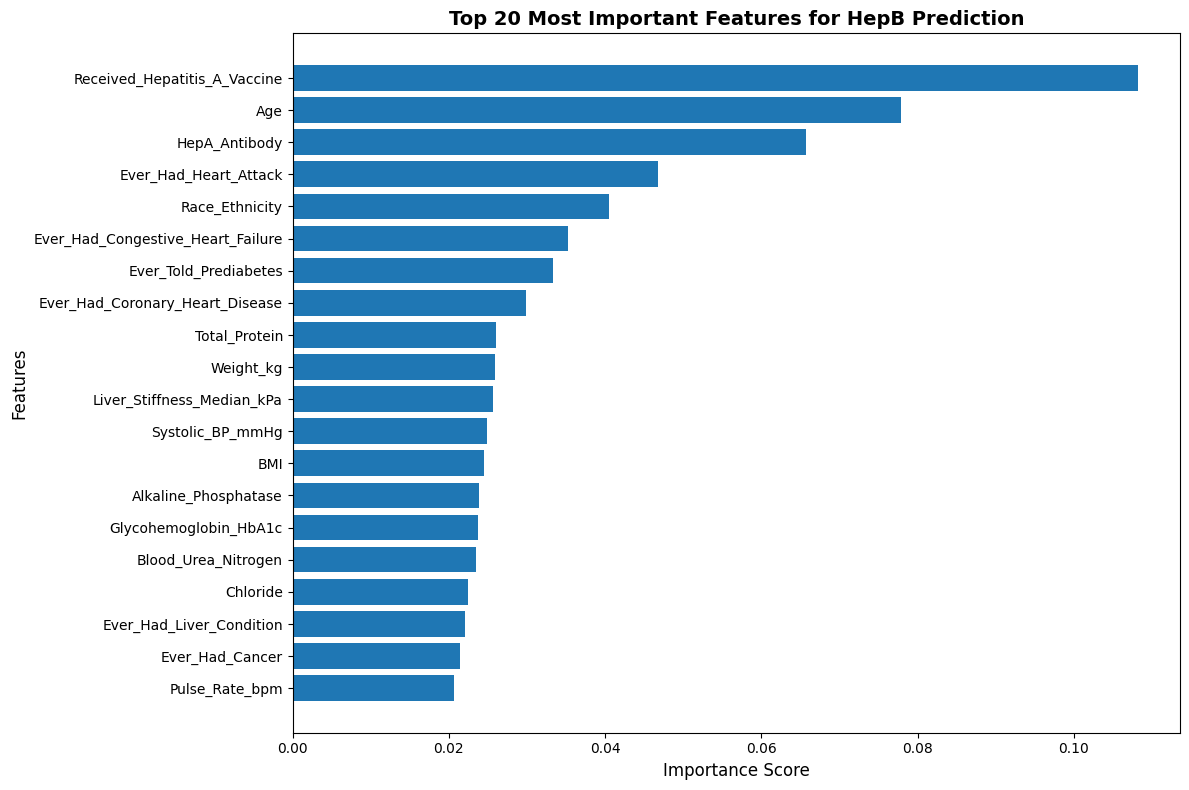

✅ Feature importance plot saved: feature_importance.png

🎉 MODEL TRAINING & SAVING COMPLETE!


In [ ]:
"""
====================================================================================
                    SAVE BEST MODEL FOR DEPLOYMENT
====================================================================================
"""

import pickle
import joblib
import json

# ============================================================================
# 🎯 SELECT & TRAIN BEST XGBOOST MODEL
# ============================================================================
print("="*90)
print("🎯 SELECTING & TRAINING BEST XGBOOST MODEL")
print("="*90)

# Use the best XGBoost from Experiment 1 (Extreme Optimization)
print("\n📊 Selected Model: XGBoost Extreme")
print("   Configuration: n_estimators=500, max_depth=7, learning_rate=0.02")

# Retrain on full resampled data
print("\n🔄 Training final model on resampled data...")
final_model = XGBClassifier(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.02,
    min_child_weight=1,
    subsample=0.9,
    colsample_bytree=0.9,
    gamma=0.05,
    reg_alpha=0.01,
    reg_lambda=0.5,
    scale_pos_weight=2.5,
    random_state=42,
    eval_metric='logloss',
    tree_method='hist',
    n_jobs=-1
)

final_model.fit(X_train_final, y_train_final)
print("✅ Model trained successfully!")

# ============================================================================
# 📊 FINAL MODEL EVALUATION
# ============================================================================
print("\n" + "="*90)
print("📊 FINAL MODEL EVALUATION")
print("="*90)

# Predict on test set
y_proba_final = final_model.predict_proba(X_test_fs)[:, 1]

# Find optimal threshold
best_threshold = 0.5
best_f1 = 0

for threshold in np.arange(0.25, 0.70, 0.02):
    y_pred_temp = (y_proba_final >= threshold).astype(int)
    try:
        f1_temp = f1_score(y_test, y_pred_temp)
        recall_temp = recall_score(y_test, y_pred_temp)
        precision_temp = precision_score(y_test, y_pred_temp)
        custom_score = f1_temp + 0.1 * min(recall_temp, precision_temp)
        
        if custom_score > best_f1:
            best_f1 = custom_score
            best_threshold = threshold
    except:
        continue

print(f"\n✅ Optimal Threshold: {best_threshold:.3f}")

# Final predictions with optimal threshold
y_pred_final = (y_proba_final >= best_threshold).astype(int)

# Calculate metrics
final_accuracy = accuracy_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_proba_final)

print("\n🎯 FINAL MODEL PERFORMANCE:")
print("="*90)
print(f"   Accuracy:  {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"   Recall:    {final_recall:.4f} ({final_recall*100:.2f}%) 🎯")
print(f"   Precision: {final_precision:.4f} ({final_precision*100:.2f}%) 🎯")
print(f"   F1-Score:  {final_f1:.4f} ({final_f1*100:.2f}%) ⭐")
print(f"   ROC-AUC:   {final_roc_auc:.4f}")

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
tn, fp, fn, tp = cm_final.ravel()

print(f"\n📊 Confusion Matrix:")
print(f"   True Negatives:  {tn:4d}  |  False Positives: {fp:4d}")
print(f"   False Negatives: {fn:4d}  |  True Positives:  {tp:4d}")
print(f"\n   ❌ Missed Cases:      {fn} ({fn/(fn+tp)*100:.1f}%)")
print(f"   ✅ Detected Cases:    {tp} ({tp/(fn+tp)*100:.1f}%)")
print(f"   ⚠️  False Alarms:     {fp} ({fp/(fp+tn)*100:.1f}%)")
print(f"   ✓  True Negatives:   {tn} ({tn/(fp+tn)*100:.1f}%)")

# ============================================================================
# 💾 SAVE MODEL & PREPROCESSING OBJECTS
# ============================================================================
print("\n" + "="*90)
print("💾 SAVING MODEL & PREPROCESSING OBJECTS")
print("="*90)

# Save the trained model
with open('xgboost_hepb_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
print("✅ Model saved: xgboost_hepb_model.pkl")

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Scaler saved: scaler.pkl")

# Save the feature selector
with open('feature_selector.pkl', 'wb') as f:
    pickle.dump(selector_mi, f)
print("✅ Feature selector saved: feature_selector.pkl")

# Save the imputers
with open('numeric_imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)
print("✅ Numeric imputer saved: numeric_imputer.pkl")

with open('categorical_imputer.pkl', 'wb') as f:
    pickle.dump(cat_imputer, f)
print("✅ Categorical imputer saved: categorical_imputer.pkl")

# Save the optimal threshold
threshold_data = {'optimal_threshold': best_threshold}
with open('threshold.json', 'w') as f:
    json.dump(threshold_data, f)
print(f"✅ Optimal threshold saved: threshold.json (value: {best_threshold:.3f})")

# Save feature names
feature_info = {
    'categorical_cols': categorical_cols,
    'numeric_cols': numeric_cols_to_impute,
    'selected_features': X_train_final.shape[1],
    'total_original_features': len(X.columns)
}
with open('feature_info.json', 'w') as f:
    json.dump(feature_info, f)
print("✅ Feature info saved: feature_info.json")

# Save model performance metrics
performance_metrics = {
    'accuracy': float(final_accuracy),
    'recall': float(final_recall),
    'precision': float(final_precision),
    'f1_score': float(final_f1),
    'roc_auc': float(final_roc_auc),
    'threshold': float(best_threshold),
    'confusion_matrix': {
        'tn': int(tn), 'fp': int(fp),
        'fn': int(fn), 'tp': int(tp)
    }
}
with open('model_metrics.json', 'w') as f:
    json.dump(performance_metrics, f, indent=4)
print("✅ Model metrics saved: model_metrics.json")

print("\n" + "="*90)
print("✅ ALL FILES SAVED SUCCESSFULLY!")
print("="*90)
print("\nSaved files:")
print("   1. xgboost_hepb_model.pkl")
print("   2. scaler.pkl")
print("   3. feature_selector.pkl")
print("   4. numeric_imputer.pkl")
print("   5. categorical_imputer.pkl")
print("   6. threshold.json")
print("   7. feature_info.json")
print("   8. model_metrics.json")
print("\n🚀 Ready for deployment with Streamlit!")
print("="*90)

# ============================================================================
# 📊 FEATURE IMPORTANCE ANALYSIS
# ============================================================================
print("\n" + "="*90)
print("📊 FEATURE IMPORTANCE ANALYSIS")
print("="*90)

# Get feature importance
feature_importance = final_model.feature_importances_

# Get feature names (after selection)
selected_feature_indices = selector_mi.get_support(indices=True)
original_feature_names = X.columns.tolist()
selected_feature_names = [original_feature_names[i] for i in selected_feature_indices]

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n🔝 TOP 20 MOST IMPORTANT FEATURES:")
print(importance_df.head(20).to_string(index=False))

# Save feature importance
importance_df.to_csv('feature_importance.csv', index=False)
print("\n✅ Feature importance saved: feature_importance.csv")

# Plot feature importance
plt.figure(figsize=(12, 8))
top_20 = importance_df.head(20)
plt.barh(range(len(top_20)), top_20['Importance'])
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 20 Most Important Features for HepB Prediction', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Feature importance plot saved: feature_importance.png")

print("\n" + "="*90)
print("🎉 MODEL TRAINING & SAVING COMPLETE!")
print("="*90)